In [11]:
#전체 메달 수
import pandas as pd

# 데이터 로드
olympic_data = pd.read_csv('olympic_results_summer.csv')

# 메달 유형별로 집계
total_medals = olympic_data.pivot_table(index=None, columns='medal_type', values='NOC', aggfunc='count', fill_value=0)

# 총 메달 수 계산
total_medals['Total_Medals'] = total_medals.sum(axis=1)

# 열 순서 정렬: 금, 은, 동, 총 메달 수
total_medals = total_medals[['GOLD', 'SILVER', 'BRONZE', 'Total_Medals']]

# 결과 출력
print("전체 메달 수:")
print(total_medals)

전체 메달 수:
medal_type  GOLD  SILVER  BRONZE  Total_Medals
NOC         5435    5398    5868         16701


In [12]:
#대한민국 선수단 메달 수
import pandas as pd

# 데이터 로드
olympic_data = pd.read_csv('olympic_results_summer.csv')

# 대한민국(KOR) 메달 수 집계
kor_medals = olympic_data[olympic_data['country_code'] == 'KR'].pivot_table(index='country_code', columns='medal_type', values='NOC', aggfunc='count', fill_value=0)

# 대한민국(KOR) 총 메달 수 계산
kor_medals['Total_Medals'] = kor_medals.sum(axis=1)
# 열 순서 정렬: 금, 은, 동, 총 메달 수
kor_medals = kor_medals[['GOLD', 'SILVER', 'BRONZE', 'Total_Medals']]

# 대한민국(KOR) 메달 수 출력
print("\n대한민국(KOR) 메달 수:")
print(kor_medals)



대한민국(KOR) 메달 수:
medal_type    GOLD  SILVER  BRONZE  Total_Medals
country_code                                    
KR              96      91     100           287


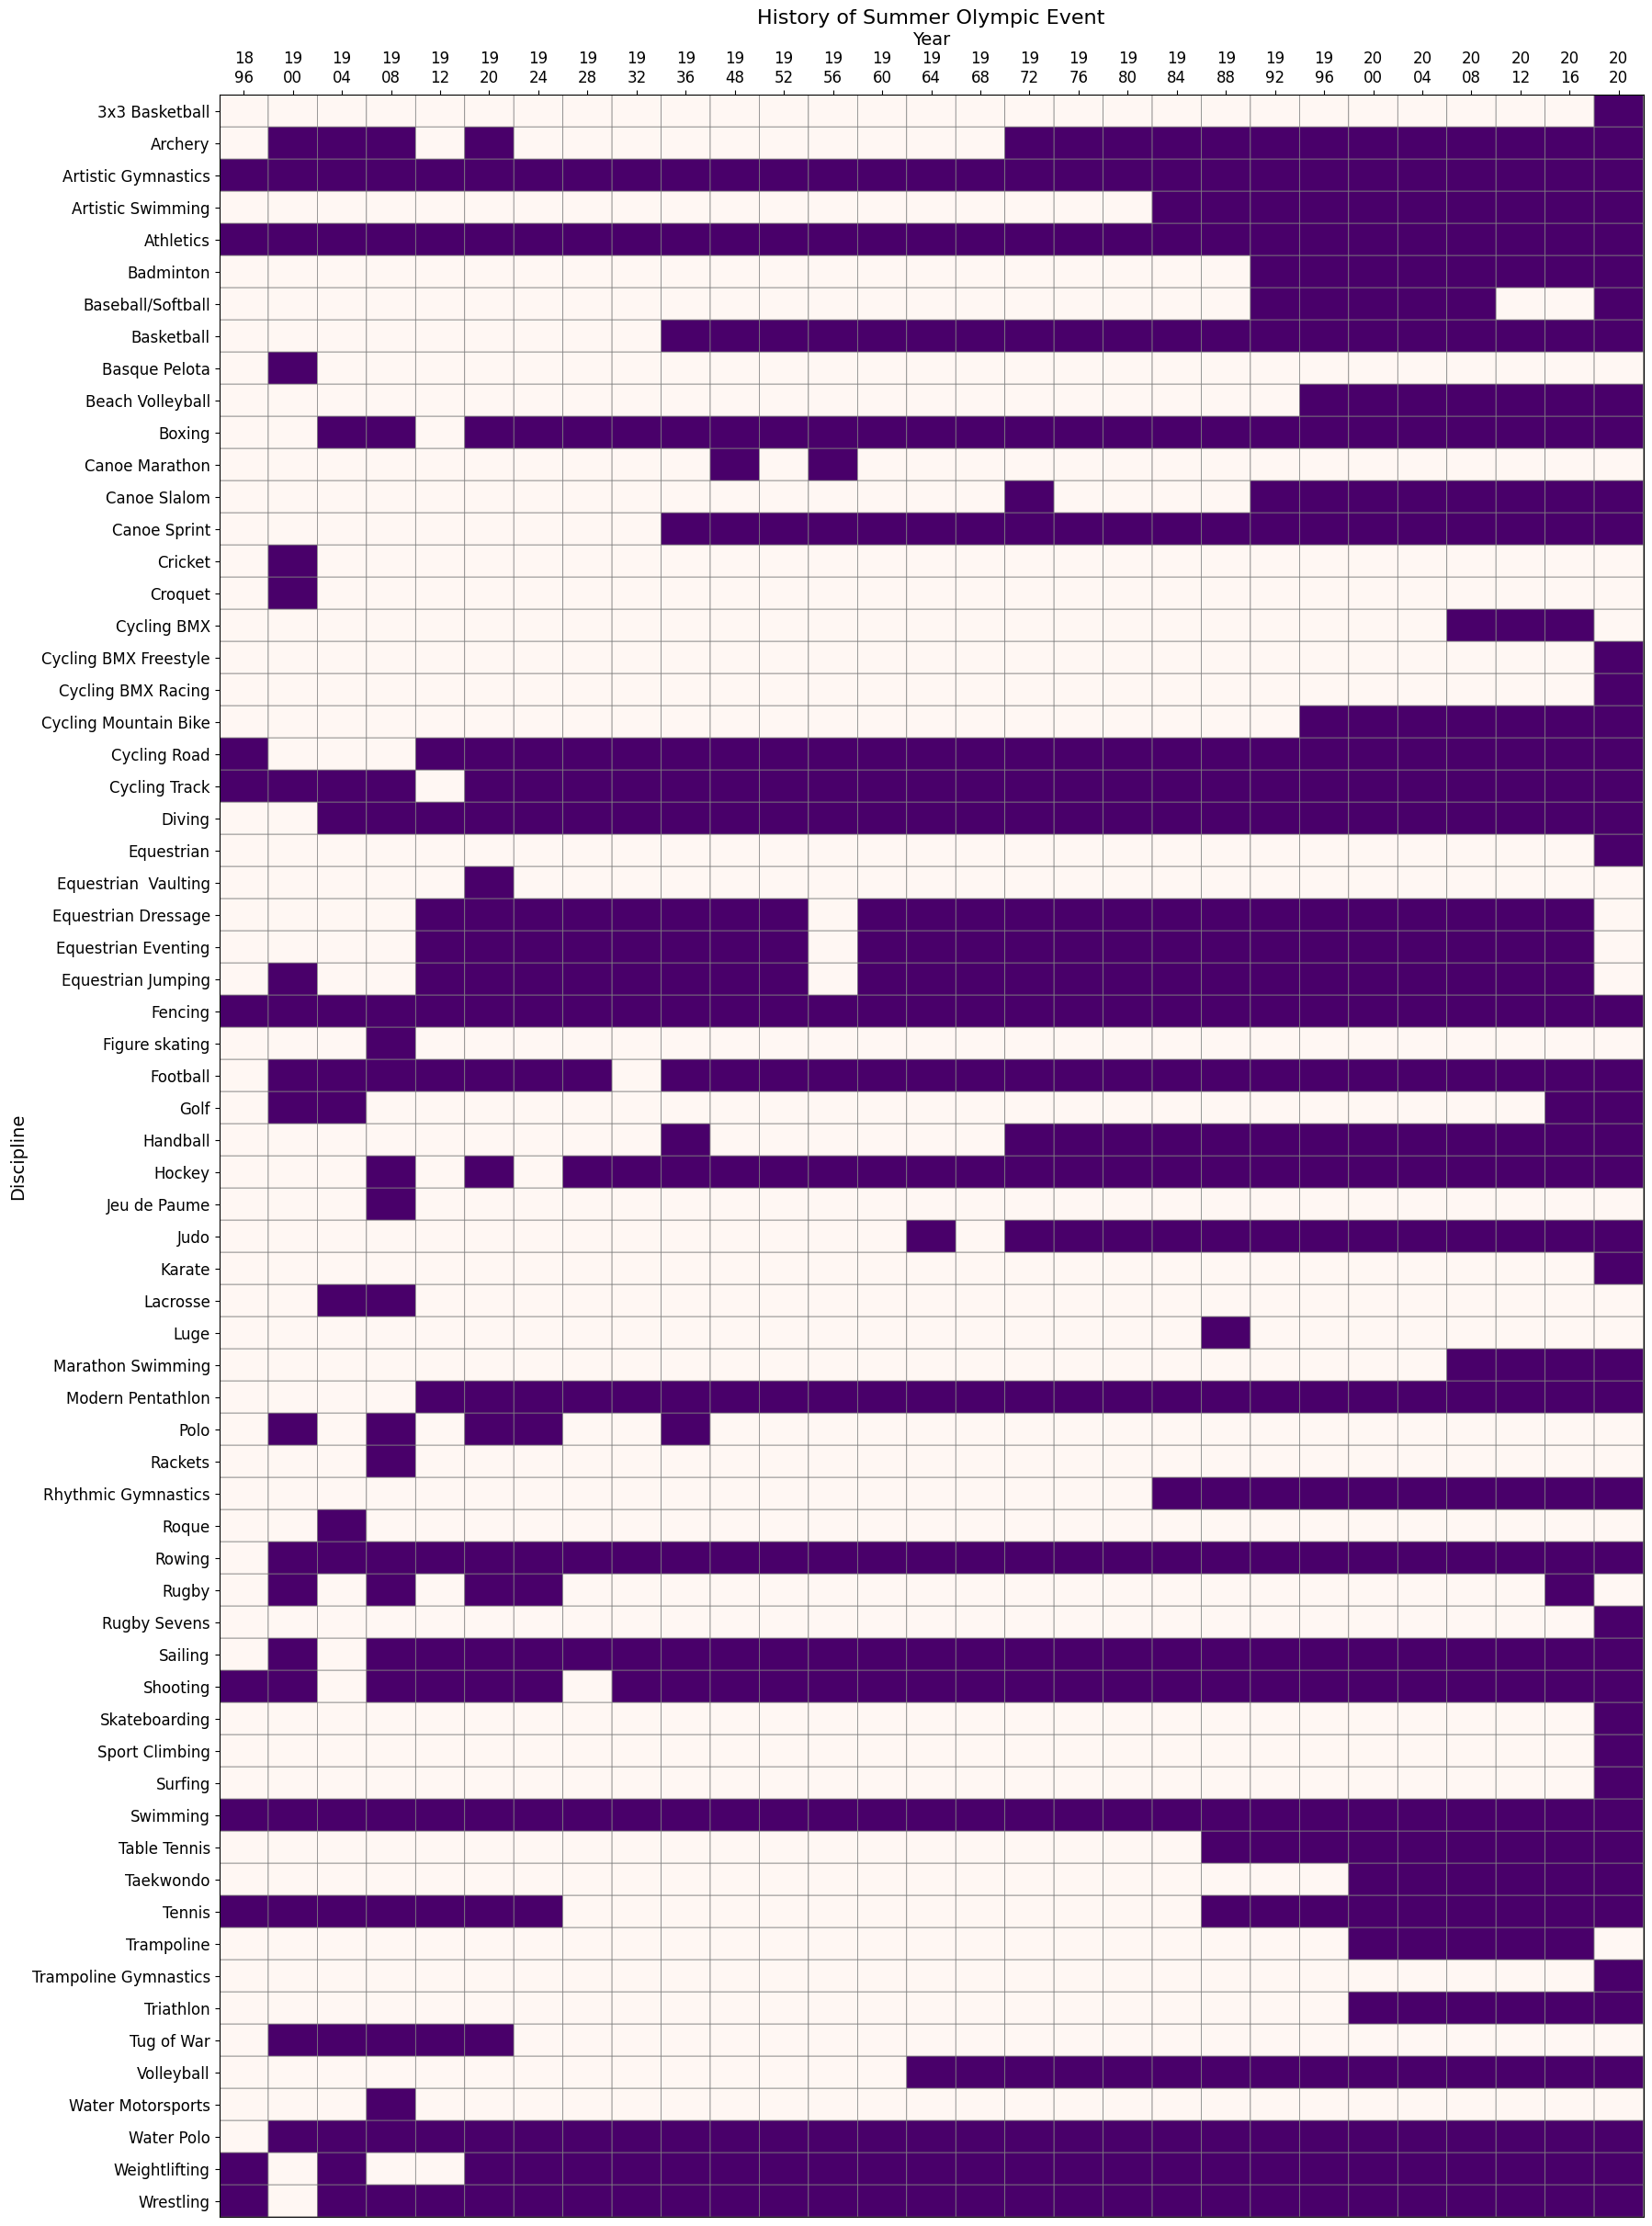

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
olympic_data = pd.read_csv('olympic_results_summer.csv')

# 종목별로 연도별 집계 (종목이 포함된 경우 1로 표시)
olympic_data['presence'] = 1
heatmap_data = olympic_data.pivot_table(index='discipline_title', columns='Year', values='presence', aggfunc='sum', fill_value=0)

# 이진 행렬로 변환
binary_data = heatmap_data.applymap(lambda x: 1 if x > 0 else 0)

# 종목을 알파벳 순서로 정렬
binary_data = binary_data.sort_index(ascending=True)

# 연도를 두 줄로 변환
years = [str(year) for year in binary_data.columns]
years_split = [f"{year[:2]}\n{year[2:]}" for year in years]

# 시각화
plt.figure(figsize=(20, 30))
ax = plt.gca()

# pcolor로 격자선을 포함한 시각화 (회색 격자선, 두께 줄임)
c = ax.pcolor(binary_data.values[::-1], cmap='RdPu', edgecolors='grey', linewidths=0.5)

# 연도를 위쪽에 표시
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
plt.xlabel('Year', fontsize=14)

plt.title('History of Summer Olympic Event', fontsize=16)
plt.ylabel('Discipline', fontsize=14)
plt.xticks(ticks=np.arange(0.5, len(binary_data.columns) + 0.5), labels=years_split, rotation=0, fontsize=12)
plt.yticks(ticks=np.arange(0.5, len(binary_data.index) + 0.5), labels=binary_data.index[::-1], fontsize=12)

plt.show()


In [16]:
#올림픽 역사적 메달 획득

import pandas as pd
import plotly.graph_objs as go
from plotly.offline import plot

# 데이터 로드
df = pd.read_csv('olympic_results_summer.csv')

# 국가 목록 생성
countries = sorted(df['NOC'].unique().tolist())

# 선택한 국가의 메달 데이터를 그래프 데이터로 변환하는 함수
def get_medal_data(country):
    country_data = df.loc[(df['NOC'] == country) & (df['Medal'].notna()), 'Year'].value_counts().sort_index()
    return go.Scatter(
        x=country_data.index, 
        y=country_data.values, 
        mode='lines+markers', 
        name=country,
        visible='legendonly'  # 이 옵션으로 초기에는 보이지 않게 설정
    )

# 모든 국가별 데이터 생성
traces = [get_medal_data(country) for country in countries]

# 그래프 생성
fig = go.Figure(data=traces)

# 그래프 레이아웃 설정
fig.update_layout(
    title='Historical Summer Olympic Medal Counts Over Years for All Countries',
    xaxis_title='Year',
    yaxis_title='Medal Count',
    legend_title='Country',
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)

# fig.show()

# HTML 파일로 저장
plot(fig, filename='olympic_medals_countries_history.html', auto_open=True)

'olympic_medals_countries_history.html'

In [17]:
import pandas as pd
import plotly.express as px

# 데이터 로드
olympic_data = pd.read_csv('olympic_results_summer.csv')

# 메달 유형별로 집계 (NaN 값은 메달을 받지 않은 것으로 가정)
medal_counts = olympic_data.pivot_table(index='country_code', columns='medal_type', values='NOC', aggfunc='count', fill_value=0)

# 총 메달 수 계산
medal_counts['Total_Medals'] = medal_counts.sum(axis=1)

# 국가 이름 및 ISO Alpha-3 코드(NOC) 데이터 추가
country_info = olympic_data[['country_code', 'country_name', 'NOC']].drop_duplicates().set_index('country_code')
medal_counts = medal_counts.join(country_info)

# 인덱스를 열로 변환
medal_counts.reset_index(inplace=True)

# 시각화
fig = px.choropleth(
    medal_counts,
    locations='NOC',  # ISO Alpha-3 코드를 사용
    color='Total_Medals',  # 총 메달 수에 따른 색상
    hover_name='country_name',  # 호버 시 나타낼 국가 이름
    color_continuous_scale=px.colors.sequential.Plasma[::-1],  # 색상 스케일
    title='Summer Olympic Medals by Country',
    range_color=(0, 2000),  # 색상 범위 조정 (데이터에 맞게 조정)
    width=1200,  # 그림의 너비 조정
    height=800,  # 그림의 높이 조정
    custom_data=['NOC', 'GOLD', 'SILVER', 'BRONZE']  # 추가할 데이터
)

# hovertemplate 설정
fig.update_traces(
    hovertemplate=(
        '<b>%{hovertext}</b><br><br>' +
        'NOC: %{customdata[0]}<br>' +
        'Gold Medals: %{customdata[1]}<br>' +
        'Silver Medals: %{customdata[2]}<br>' +
        'Bronze Medals: %{customdata[3]}<br>' +
        'Total Medals: %{z}<br>'
    )
)

# fig.show()

plot(fig, filename='olympic_medals_countries_map.html', auto_open=True)


'olympic_medals_countries_map.html'